# ANALISIS DATA CALEG DPR NTT 2019
Untuk artikel lengkapnya bisa cek di [sini](#). Untuk pengolahan data menggunakan bahasa python dan Jupyter Notebook. Data yang diolah bisa dilihat di bawah.

## Prerequisites
1. Install [Python](https://realpython.com/installing-python/)
2. Install [Jupiter Notebook](https://jupyter.readthedocs.io/en/latest/install.html)

## Install Library
```sh
$ pip3 install mysql-connector
$ pip3 install matplotlib
```





### Import

In [1]:
import mysql.connector
import matplotlib.pyplot as plt


### Base Configuration

In [16]:
mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  passwd="",
  db="pemilu_ntt"
)

def selectDataMySQL(query):
    mycursor = mydb.cursor()
    mycursor.execute(query)
    myresult = mycursor.fetchall()
    return myresult

def showPieGraphic(label,value,title):
    plt.pie(value, labels=label, startangle=90, autopct='%.1f%%')
    plt.title(title)
    plt.show()

### Caleg termuda, tertua dan rata-rata umur caleg


In [7]:
dataYoungerNtt1 = selectDataMySQL('SELECT  nama_lengkap,YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y")) AS age FROM caleg_details where (YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y")) = (SELECT min(YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y"))) from caleg_details WHERE dapil_id = 60)) and dapil_id = 60')
print("Caleg termuda dari Dapil NTT 1 adalah %s dengan umur %s"%(dataYoungerNtt1[0][0],dataYoungerNtt1[0][1]))

dataYoungerNtt2 = selectDataMySQL('SELECT  nama_lengkap,YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y")) AS age FROM caleg_details where (YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y")) = (SELECT min(YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y"))) from caleg_details WHERE dapil_id = 61)) and dapil_id = 61')
print("Caleg termuda dari Dapil NTT 2 adalah %s dengan umur %s"%(dataYoungerNtt2[0][0],dataYoungerNtt2[0][1]))

dataOlderNtt1 = selectDataMySQL('SELECT  nama_lengkap,YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y")) AS age FROM caleg_details where (YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y")) = (SELECT max(YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y"))) from caleg_details WHERE dapil_id = 60)) and dapil_id = 60')
print("Caleg tertua dari Dapil NTT 1 adalah %s dengan umur %s"%(dataOlderNtt1[0][0],dataOlderNtt1[0][1]))

dataOlderNtt2 = selectDataMySQL('SELECT  nama_lengkap,YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y")) AS age FROM caleg_details where (YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y")) = (SELECT max(YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y"))) from caleg_details WHERE dapil_id = 61)) and dapil_id = 61')
print("Caleg tertua dari Dapil NTT 2 adalah %s dengan umur %s"%(dataOlderNtt2[0][0],dataOlderNtt2[0][1]))

averageOldNtt1 = selectDataMySQL('SELECT AVG(YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y"))) as average FROM caleg_details where dapil_id = 60')
print("Rata-rata umur caleg dari Dapil NTT 1 adalah %s tahun"%(averageOldNtt1[0][0]))

averageOldNtt2 = selectDataMySQL('SELECT AVG(YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y"))) as average FROM caleg_details where dapil_id = 61')
print("Rata-rata umur caleg dari Dapil NTT 2 adalah %s tahun"%(averageOldNtt2[0][0]))



Caleg termuda dari Dapil NTT 1 adalah SITI AMINAH dengan umur 23
Caleg termuda dari Dapil NTT 2 adalah SRI ISMAWATI dengan umur 24
Caleg tertua dari Dapil NTT 1 adalah PAULUS MOA dengan umur 79
Caleg tertua dari Dapil NTT 2 adalah MARIA AGUSTINA NOACH dengan umur 81
Rata-rata umur caleg dari Dapil NTT 1 adalah 49.2892 tahun
Rata-rata umur caleg dari Dapil NTT 2 adalah 47.7835 tahun



### Distribusi jumlah caleg berdasarkan jenis kelamin


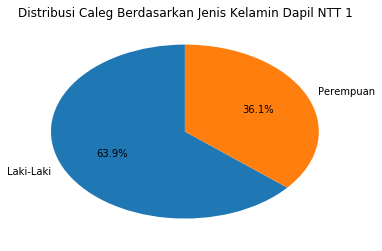

In [17]:
dataAgeNtt1 = selectDataMySQL('SELECT jenis_kelamin,COUNT(jenis_kelamin) FROM caleg_details WHERE dapil_id = 60 GROUP by jenis_kelamin')
jenisKelamin = []
jumlah = []
for data in dataAgeNtt1:
    jenisKelamin.append(data[0])
    jumlah.append(data[1])

showPieGraphic(jenisKelamin,jumlah,'Distribusi Caleg Berdasarkan Jenis Kelamin Dapil NTT 1')


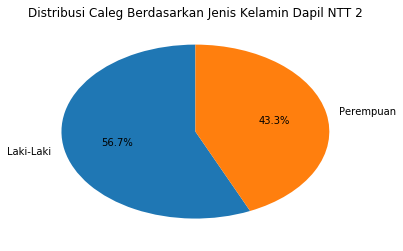

In [18]:
dataAgeNtt1 = selectDataMySQL('SELECT jenis_kelamin,COUNT(jenis_kelamin) FROM caleg_details WHERE dapil_id = 61 GROUP by jenis_kelamin')
jenisKelamin = []
jumlah = []
for data in dataAgeNtt1:
    jenisKelamin.append(data[0])
    jumlah.append(data[1])

showPieGraphic(jenisKelamin,jumlah,'Distribusi Caleg Berdasarkan Jenis Kelamin Dapil NTT 2')


### Distribusi jumlah caleg berdasarkan pendidikan



### Distribusi jumlah caleg berdasarkan agama



### Distribusi jumlah caleg berdasarkan umur



### Distribusi jumlah caleg berdasarkan pekerjaan



### Distribusi jumlah caleg berdasarkan pendidikan